# movie_budget_and_revenue.ipynb

In this notebook we will explore movie budget and revenue, as well as profit and ROI (Return on Investment).

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from reader import generic_reader

First we read in the movie data from `movies_clean.csv` and see that we have 20489 movies.

In [2]:
df_movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies_clean.csv")
len(df_movies)

20489

Then we choose the columns we will work in this notebook.

In [3]:
columns_to_keep = ['movie_id', 'original_title', 'release_date', 'vote_average', 'budget_2023_usd', 'revenue_2023_usd']
df_movies = df_movies[columns_to_keep].copy()
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies

,movie_id,original_title,release_date,vote_average,budget_2023_usd,revenue_2023_usd
0,300236,Carnage: The Legend of Quiltface,2000-01-01,2.500,0,0
1,96716,The Bumblebee Flies Anyway,2000-01-01,6.200,0,0
2,71618,After Sex,2000-01-01,5.000,0,0
3,56721,The Mummy Theme Park,2000-01-01,4.000,0,0
4,48235,The Complete Works of William Shakespeare (Abr...,2000-01-01,7.100,0,0
...,...,...,...,...,...,...
20484,994108,All of Us Strangers,2023-12-22,7.443,5000000,14864960
20485,979097,Memory,2023-12-22,7.093,0,313000
20486,1180358,A Royal Christmas Holiday,2023-12-23,5.800,0,0
20487,823452,The Boys in the Boat,2023-12-25,7.233,40000000,54401583


We see that a lot of movies have either budget or revenue of 0.

This is because TMDB will report these as 0 if the value is missing.

So we now drop all the movies that have either budget or revenue as 0, and see that we are left with 4042 movies.

In [4]:
df_movies = df_movies[df_movies['budget_2023_usd'] != 0].copy()
df_movies = df_movies[df_movies['revenue_2023_usd'] != 0].copy()
len(df_movies)

4042

In [5]:
df_movies.describe()

,movie_id,release_date,vote_average,budget_2023_usd,revenue_2023_usd
count,4.042000e+03,4042,4042.000000,4.042000e+03,4.042000e+03
mean,1.712827e+05,2011-03-02 03:17:43.433943552,6.270878,5.115258e+07,1.322323e+08
min,2.200000e+01,2000-01-07 00:00:00,1.800000,3.000000e+00,1.000000e+00
25%,1.118775e+04,2005-11-06 18:00:00,5.800000,1.083676e+07,6.031520e+06
50%,4.573750e+04,2010-11-05 12:00:00,6.300000,2.879737e+07,4.401183e+07
75%,3.005370e+05,2016-04-27 00:00:00,6.800000,6.435468e+07,1.442335e+08
max,1.160164e+06,2023-12-25 00:00:00,8.523000,6.079353e+08,4.152467e+09
std,2.247763e+05,NaN,0.821069,6.259693e+07,2.523232e+08


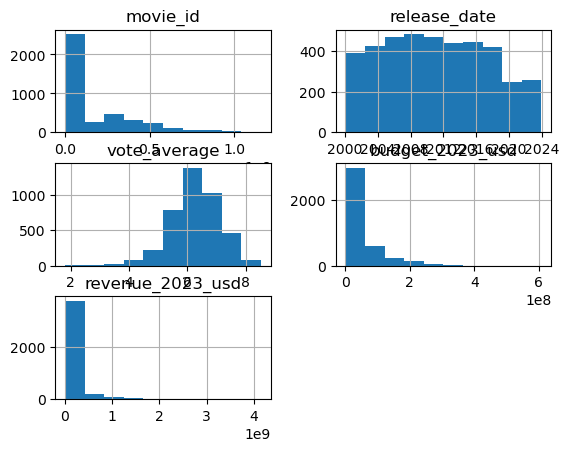

In [6]:
df_movies.hist();

Now we calculate profit and ROI.

**_Profit = Revenue – Budget_**

**_ROI (%) = Profit / Budget × 100_**

In [7]:
df_movies['profit_2023_usd'] = df_movies['revenue_2023_usd'] - df_movies['budget_2023_usd']
df_movies['roi'] = ( df_movies['profit_2023_usd'] / df_movies['budget_2023_usd'] )*100
df_movies

,movie_id,original_title,release_date,vote_average,budget_2023_usd,revenue_2023_usd,profit_2023_usd,roi
6,19214,Passion of Mind,2000-01-07,5.800,21233560,1361199,-19872361,-93.589398
13,17908,My Dog Skip,2000-01-12,6.700,10616780,62900459,52283679,492.462677
14,10471,Next Friday,2000-01-12,6.453,19464096,105862262,86398166,443.884812
16,10384,Supernova,2000-01-14,4.940,159251699,26237745,-133013954,-83.524355
21,10213,From Dusk Till Dawn 3: The Hangman's Daughter,2000-01-18,4.900,8847317,17017,-8830300,-99.807659
...,...,...,...,...,...,...,...,...
20481,850165,The Iron Claw,2023-12-21,7.540,15900000,40130232,24230232,152.391396
20482,1025491,Freud's Last Session,2023-12-22,6.659,10000000,1697993,-8302007,-83.020070
20484,994108,All of Us Strangers,2023-12-22,7.443,5000000,14864960,9864960,197.299200
20487,823452,The Boys in the Boat,2023-12-25,7.233,40000000,54401583,14401583,36.003957


And now we we plot budget along the x-axis and revenue along the y-axis.

The red line represents break even.

We see that most movies are above the red line, so most movies actually do make a profit.

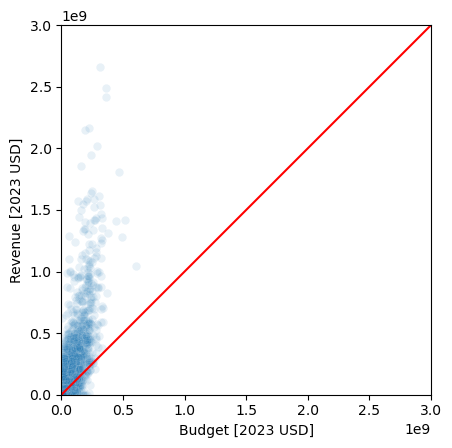

In [8]:
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['revenue_2023_usd'], alpha=0.1)
plt.xlim(0, 3e9)
plt.ylim(0, 3e9)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 3e9], [0, 3e9], color='red')
plt.xlabel("Budget [2023 USD]")
plt.ylabel("Revenue [2023 USD]");

Here we plot budget along the x-axis and profit along the y-axis.

Again the red line represents break even.

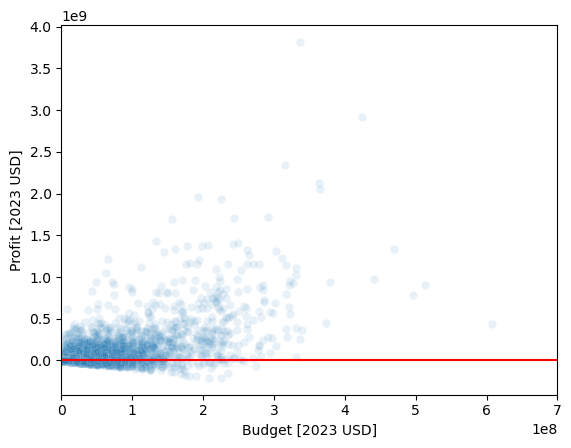

In [9]:
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['profit_2023_usd'], alpha=0.1)
plt.xlim(0, 7e8)
plt.plot([0, 7e8], [0, 0], color='red')
plt.xlabel("Budget [2023 USD]")
plt.ylabel("Profit [2023 USD]");

Now we explore which movies have made highest and lowest profit.

In [10]:
df_movies.sort_values(by="profit_2023_usd", ascending=False)

,movie_id,original_title,release_date,vote_average,budget_2023_usd,revenue_2023_usd,profit_2023_usd,roi
6206,19995,Avatar,2009-12-15,7.600,336605225,4152467198,3815861973,1133.631236
15979,299534,Avengers: Endgame,2019-04-24,8.238,424293436,3336470881,2912177445,686.359297
11913,140607,Star Wars: The Force Awakens,2015-12-15,7.300,314964276,2658843091,2343878815,744.172909
14717,299536,Avengers: Infinity War,2018-04-25,8.236,364030217,2490470306,2126440089,584.138346
19689,76600,Avatar: The Way of Water,2022-12-14,7.610,364407184,2415759634,2051352450,562.928652
...,...,...,...,...,...,...,...,...
20332,800158,The Killer,2023-10-25,6.575,175000000,362113,-174637887,-99.793078
18610,512195,Red Notice,2021-11-04,6.756,179917697,200319,-179717378,-99.888661
16614,398978,The Irishman,2019-11-01,7.583,189501843,1154713,-188347130,-99.390659
19229,725201,The Gray Man,2022-07-13,6.931,208232677,472712,-207759965,-99.772989


We see that there are several movies at the bottom of the list which have made huge losses:

E.g. "The Killer" from 2023 had a budget of 175 millions USD but only a revenue of 362,113 USD.

However, this is because these movies had very limited theatrical releases, and then were released on streaming services.

This trend of making movies and then releasing them directly (or almost directly) to streaming services started in 2015.

And even before 2015, films may be made as direct to VHS/DVD, but given a limited theatrical release first.

This means that in this exam project, we can not trust revenue to be a reliable predictor of a movies success.



## Budget vs. vote_average

In [11]:
positive_count = (df_movies['profit_2023_usd'] >= 0).sum()
print(positive_count)
negative_count = (df_movies['profit_2023_usd'] < 0).sum()
print(negative_count)
percentage = positive_count / len(df_movies)*100
print(percentage)

2464
1578
60.95992083127165


Netflix's Beasts of No Nation (2015)

<Axes: xlabel='budget_2023_usd', ylabel='vote_average'>

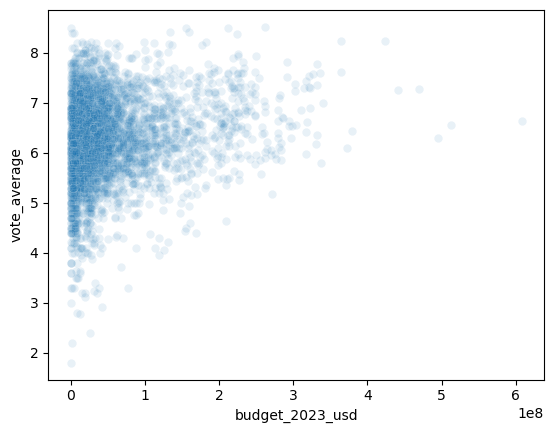

In [12]:
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['vote_average'], alpha=0.1)